# Customer Personality Analysis

**Customer Personality Analysis is a detailed analysis of a company's ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors, and concerns of different types of customers. In this Notebook, I will perform a detailed analysis and segment the customers into various clusters that can help the business better understand its customers and make it easier for them to modify products according to the specific needs, behaviors, and concerns of different types of customers.**

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="white", palette='pastel', rc=custom_params)
sns.color_palette(palette='pastel', as_cmap=True)
import statsmodels.api as sm
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Read the data
marketing_data = pd.read_csv('/content/marketing_campaign.csv', sep= '\t')

In [ ]:
# Display all columns
pd.options.display.max_columns = marketing_data.shape[1]

In [ ]:
marketing_data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [ ]:
marketing_data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

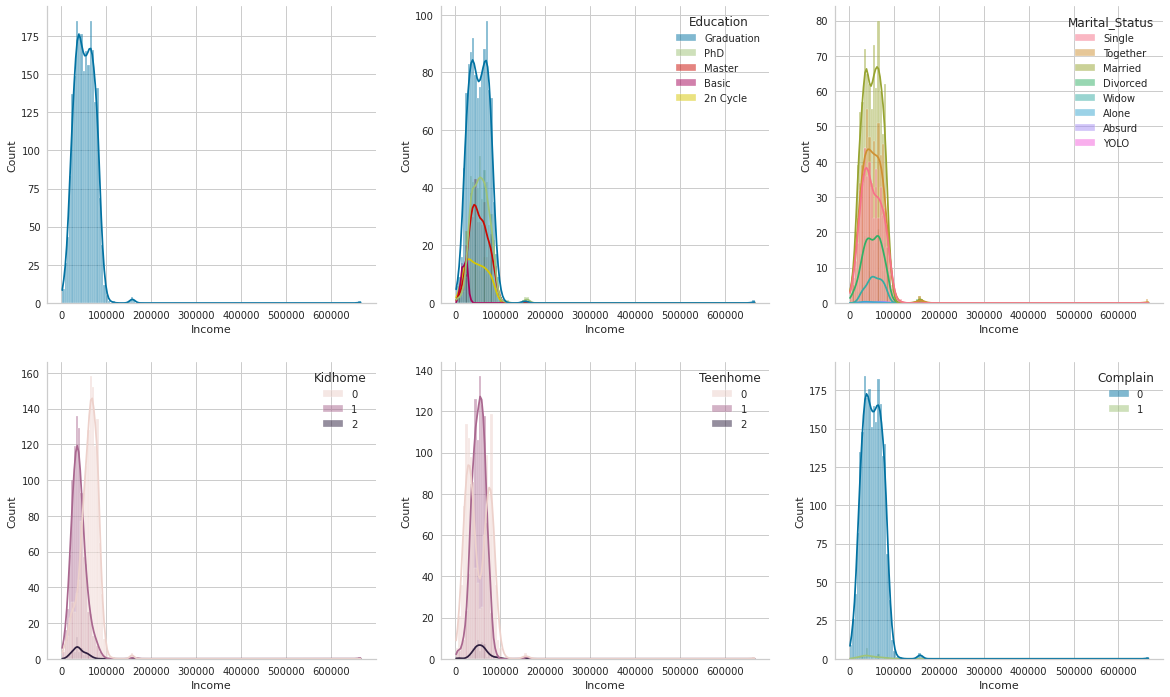

In [ ]:
# PLot the income w.r.t every categorical variable
fig, (ax1, ax2) = plt.subplots(2, 3, figsize=(20, 12))

sns.histplot(data=marketing_data, x='Income', kde=True, ax=ax1[0])
sns.histplot(data=marketing_data, x='Income', hue='Education', kde=True, ax=ax1[1])
sns.histplot(data=marketing_data, x='Income', hue='Marital_Status', kde=True, ax=ax1[2])
sns.histplot(data=marketing_data, x='Income', hue='Kidhome', kde=True, ax=ax2[0])
sns.histplot(data=marketing_data, x='Income', hue='Teenhome', kde=True, ax=ax2[1])
sns.histplot(data=marketing_data, x='Income', hue='Complain', kde=True, ax=ax2[2])

plt.show()

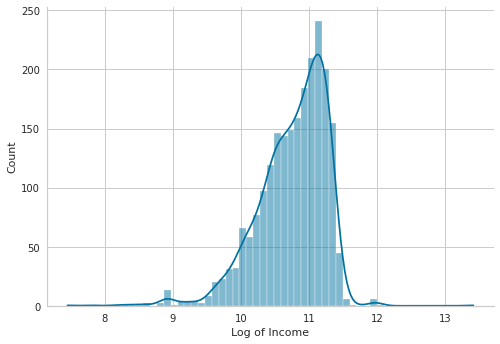

In [ ]:
# Convert the distribution with logarithmic distribution
sns.histplot(np.log(marketing_data['Income']), kde=True)
plt.xlabel("Log of Income")
plt.show()

In [ ]:
# Calculate the mean value of the log income and take the exponent to impute the null values
log_mean = np.mean(np.log(marketing_data['Income']))
null_income_imputed_val = np.exp(log_mean)

In [ ]:
# Fill the null values in the income column
marketing_data['Income'] = marketing_data['Income'].fillna(null_income_imputed_val)

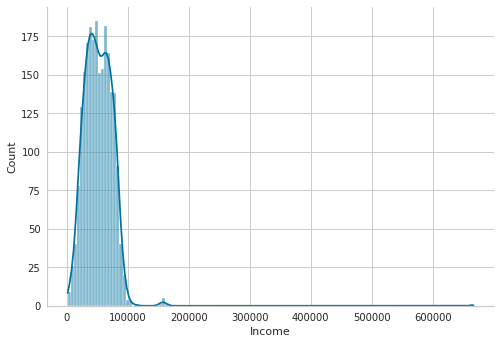

In [ ]:
# Plot the distribution of the income again
sns.histplot(data=marketing_data, x='Income', kde=True)
plt.show()

In [ ]:
# Check for null values again
marketing_data.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [ ]:
marketing_data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


# Feature Engineering

1. Age of Customers
2. Number of Children
3. Number of Family members
4. Whether a customer is a parent or not
5. Number of Years since customer
6. Total amount spent
7. Amount Spent and Income Ratio

In [ ]:
# Creating new features

# 1. Age of Customers
marketing_data['Age_of_Customer'] = 2021 - marketing_data['Year_Birth']

# 2. Number of Children
marketing_data['Children_Count'] = marketing_data['Kidhome'] + marketing_data['Teenhome']

# 3. Number of Family Members
marital_status = {'Married' : 2,
                  'Together' : 2,
                  'Single' : 1, 
                  'Divorced' : 1,
                  'Widow' : 1,
                  'Alone' : 1,
                  'Absurd' : 1,
                  'YOLO' : 1
                 }
marketing_data['Family_Members_Count'] = marketing_data['Children_Count'] + marketing_data['Marital_Status'].apply(lambda x : marital_status[x])

# 4. Whether the customer is a parent or not
marketing_data['Is_Parent'] = marketing_data['Children_Count'].apply(lambda x : 1 if x > 0 else 0)
marketing_data.head()

# 5. Number of years since customer
marketing_data['Dt_Customer'] = pd.to_datetime(marketing_data['Dt_Customer'])
marketing_data["Num_year_since_customer"] = 2021 - marketing_data['Dt_Customer'].dt.year

# 6. Total Amount spent on order
marketing_data['Amount_Spent'] = (marketing_data['MntWines'] +
                                  marketing_data['MntFruits'] + 
                                  marketing_data['MntMeatProducts'] +
                                  marketing_data['MntFishProducts'] +
                                  marketing_data['MntSweetProducts'] +
                                  marketing_data['MntGoldProds'])

# 7. Amount Spent Income Ratio
marketing_data['AmountSpent_Income_Ratio'] = marketing_data['Amount_Spent']/marketing_data['Income']

In [ ]:
marketing_data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age_of_Customer,Children_Count,Family_Members_Count,Is_Parent,Num_year_since_customer,Amount_Spent,AmountSpent_Income_Ratio
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,88,546,172,88,...,0,0,0,0,3,11,1,64,0,1,0,9,1617,0.027813
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,1,6,2,1,...,0,0,0,0,3,11,0,67,2,3,1,7,27,0.000583
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,...,0,0,0,0,3,11,0,56,0,2,0,8,776,0.010836
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,4,20,10,3,...,0,0,0,0,3,11,0,37,1,3,1,7,53,0.001989
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,...,0,0,0,0,3,11,0,40,1,3,1,7,422,0.007239


In [ ]:
# Visualist the overall data description
marketing_data.describe().drop('ID', axis=1)

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age_of_Customer,Children_Count,Family_Members_Count,Is_Parent,Num_year_since_customer,Amount_Spent,AmountSpent_Income_Ratio
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,1968.805804,52188.968602,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,...,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107,52.194196,0.950446,2.595089,0.715179,7.971875,605.798214,0.009917
std,11.984069,25044.062616,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,...,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274,11.984069,0.751803,0.906959,0.451430,0.684554,602.249288,0.016766
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,25.000000,0.000000,1.000000,0.000000,7.000000,5.000000,0.000039
25%,1959.000000,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,44.000000,0.000000,2.000000,0.000000,8.000000,68.750000,0.002328
50%,1970.000000,51075.000000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,51.000000,1.000000,3.000000,1.000000,8.000000,396.000000,0.007973
75%,1977.000000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,62.000000,1.000000,3.000000,1.000000,8.000000,1045.500000,0.015522
max,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,...,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000,128.000000,3.000000,5.000000,1.000000,9.000000,2525.000000,0.706988


In [ ]:
# Z_CostContact and Z_Revenue have constant values throughout, it is better to drop these variables
marketing_data.drop(['Z_CostContact', 'Z_Revenue'], axis=1, inplace=True)

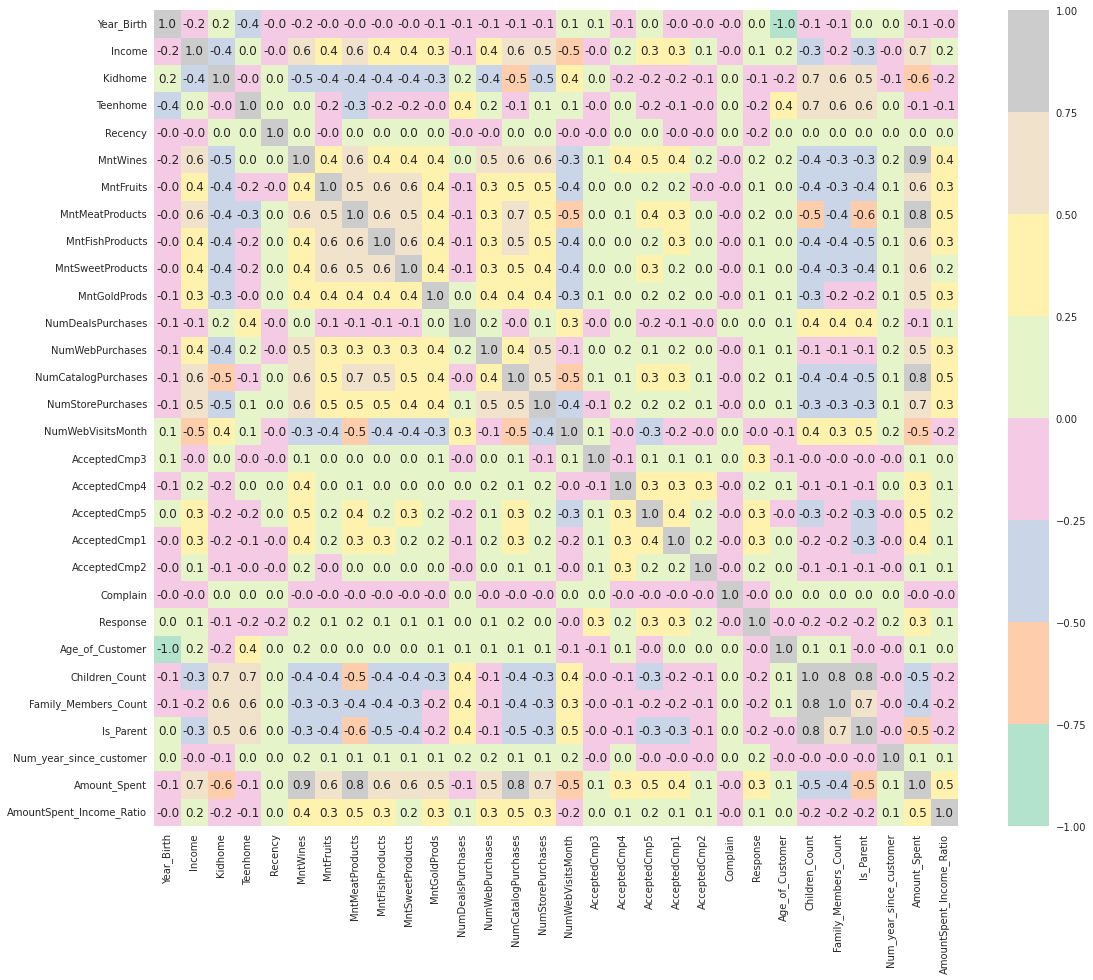

In [ ]:
# Plot the correlation heatmap
corr_matrix = marketing_data.drop('ID', axis=1).corr()
plt.figure(figsize=(18, 15))
sns.heatmap(corr_matrix, annot=True,fmt = ".1f", cmap='Pastel2')
plt.show()

In [ ]:
# Drop the redundant columns
redundant_columns = ['Kidhome', 'Teenhome', 'Dt_Customer', 'Year_Birth']
marketing_data.drop(redundant_columns, axis=1, inplace=True)

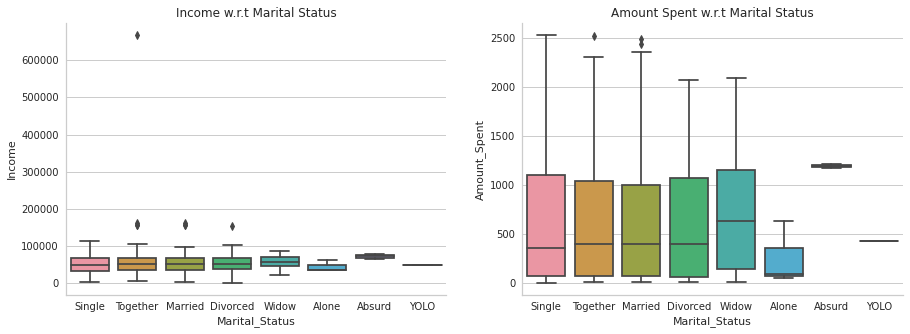

In [ ]:
# Visualise the Income and amount spent w.r.t marital status
fig, ax = plt.subplots(1, 2, figsize=(15,5))
sns.boxplot(data=marketing_data, x='Marital_Status', y='Income', ax=ax[0])
sns.boxplot(data=marketing_data, x='Marital_Status', y='Amount_Spent', ax=ax[1])
ax[0].set_title("Income w.r.t Marital Status")
ax[1].set_title("Amount Spent w.r.t Marital Status")
fig.show()


In [ ]:
# Absurd and YOLO seems strange categories
marketing_data[(marketing_data['Marital_Status'] == 'Absurd') | (marketing_data['Marital_Status'] == 'YOLO')]

,ID,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age_of_Customer,Children_Count,Family_Members_Count,Is_Parent,Num_year_since_customer,Amount_Spent,AmountSpent_Income_Ratio
2093,7734,Graduation,Absurd,79244.0,58,471,102,125,212,61,245,1,4,10,...,0,0,1,1,0,0,1,28,0,1,0,9,1216,0.015345
2134,4369,Master,Absurd,65487.0,48,240,67,500,199,0,163,3,3,5,...,0,0,0,0,0,0,0,64,0,1,0,7,1169,0.017851
2177,492,PhD,YOLO,48432.0,3,322,3,50,4,3,42,5,7,1,...,0,0,0,0,0,0,0,48,1,2,1,9,424,0.008755
2202,11133,PhD,YOLO,48432.0,3,322,3,50,4,3,42,5,7,1,...,0,0,0,0,0,0,1,48,1,2,1,9,424,0.008755


* The data points with Marital Status as YOLO, is probably a repeated value that too with just 2 values and should be removed.
* "Absurd" category also has to few entries, hence can be removed.

In [ ]:
values_to_drop = marketing_data[(marketing_data['Marital_Status'] == 'Absurd') | (marketing_data['Marital_Status'] == 'YOLO')].index
marketing_data.drop(index=values_to_drop, inplace=True)

In [ ]:
marketing_data['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Name: Marital_Status, dtype: int64

* Categories like Single, Divorced, Widow and Alone can be grouped as one while the categories like Married and Together can be grouped together.

In [ ]:
# Group the marital status into broader categories
marketing_data['Marital_Status'].replace(to_replace=['Single', 'Divorced', 'Widow', 'Alone'], value='Single', inplace=True)
marketing_data['Marital_Status'].replace(to_replace=['Married', 'Together'], value='Together', inplace=True)

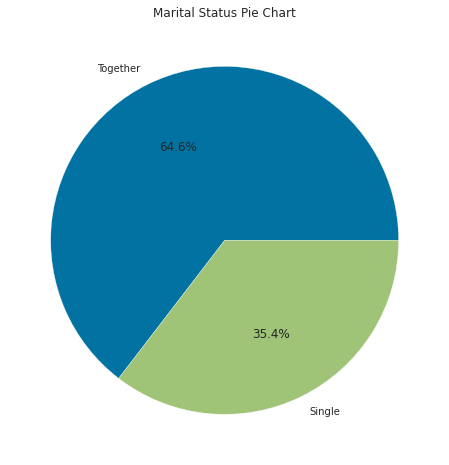

In [ ]:
# Plot the marital status pie chart
plt.figure(figsize=(12,8))
plt.pie(marketing_data['Marital_Status'].value_counts(), labels=['Together', 'Single'], autopct="%1.1f%%")
plt.title("Marital Status Pie Chart")
plt.show()

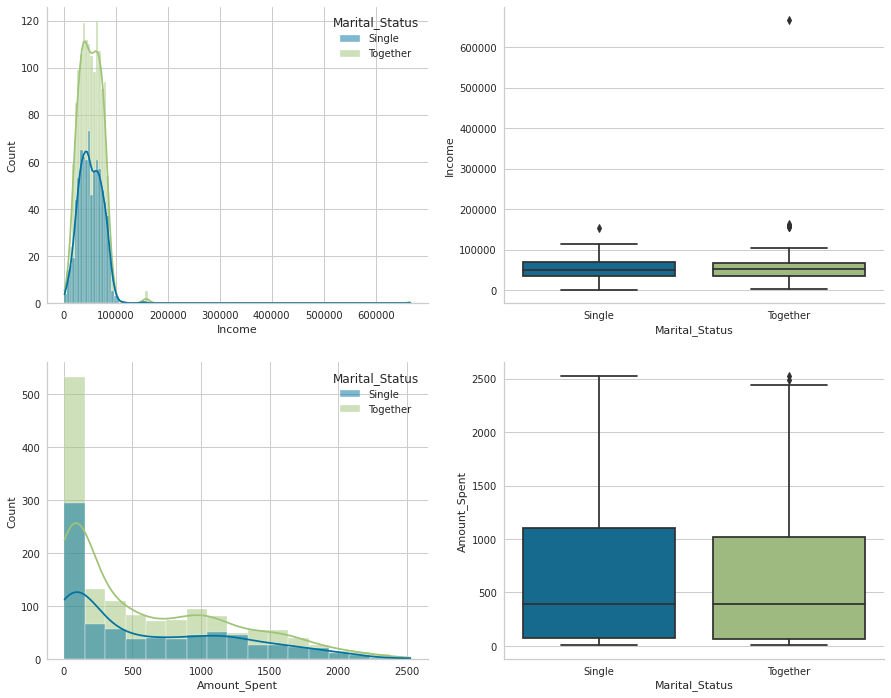

In [ ]:
# Plot the income distribution and spend distribution w.r.t marital status
fig, (ax1, ax2) = plt.subplots(2, 2, figsize=(15,12))
sns.histplot(data=marketing_data, x='Income', hue='Marital_Status', kde=True, ax=ax1[0])
sns.boxplot(data=marketing_data, x='Marital_Status', y='Income', ax=ax1[1])
sns.histplot(data=marketing_data, x='Amount_Spent', hue='Marital_Status', kde=True, ax=ax2[0])
sns.boxplot(data=marketing_data, x='Marital_Status', y='Amount_Spent', ax=ax2[1])
fig.show()

* Income column in "together" category seems to have an outlier.

In [ ]:
marketing_data[marketing_data['Income'] > 300000]

,ID,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age_of_Customer,Children_Count,Family_Members_Count,Is_Parent,Num_year_since_customer,Amount_Spent,AmountSpent_Income_Ratio
2233,9432,Graduation,Together,666666.0,23,9,14,18,8,1,12,4,3,1,...,0,0,0,0,0,0,0,44,1,3,1,8,62,0.000093


* The Amount Spent and Income ratio for the above value is very less, the point probably seems a outlier.

In [ ]:
outlier_income = marketing_data[marketing_data['Income'] > 300000].index
marketing_data.drop(index=outlier_income, inplace=True)

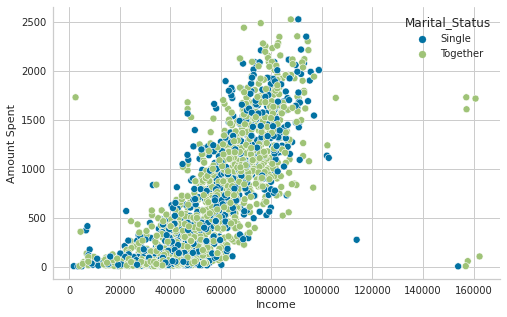

In [ ]:
# Plot the scatterplot b/w Amount Spent and Income
plt.figure(figsize=(8, 5))
sns.scatterplot(data=marketing_data, x='Income', y='Amount_Spent', hue='Marital_Status')
plt.xlabel("Income")
plt.ylabel("Amount Spent")
plt.show()

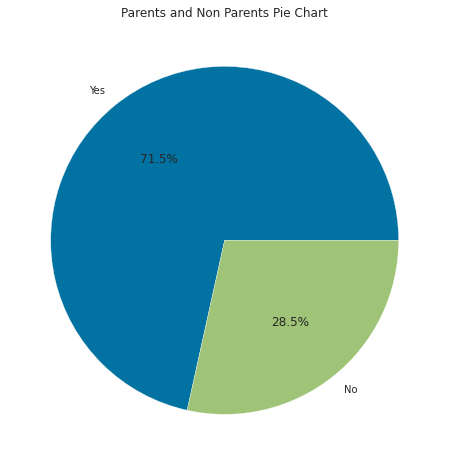

In [ ]:
# Plot the distribution of parents and non parents
plt.figure(figsize=(12,8))
plt.pie(marketing_data['Is_Parent'].value_counts(), labels=['Yes', 'No'], autopct="%1.1f%%")
plt.title("Parents and Non Parents Pie Chart")
plt.show()

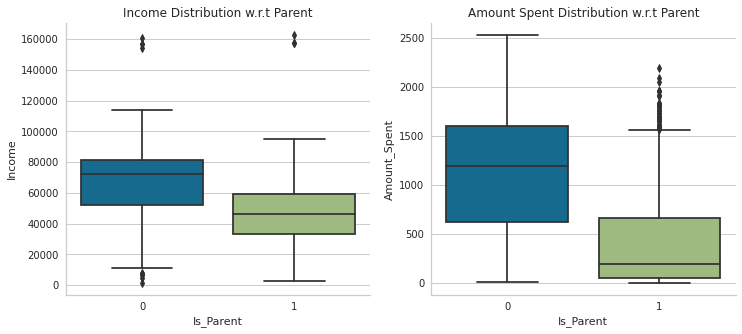

In [ ]:
# Plot the Income and amount w.r.t Is_Parent
fig, ax = plt.subplots(1, 2, figsize=(12,5))
sns.boxplot(data=marketing_data, x='Is_Parent', y='Income', ax=ax[0])
sns.boxplot(data=marketing_data, x='Is_Parent', y='Amount_Spent', ax=ax[1])
ax[0].set_title("Income Distribution w.r.t Parent")
ax[1].set_title("Amount Spent Distribution w.r.t Parent")
plt.show()

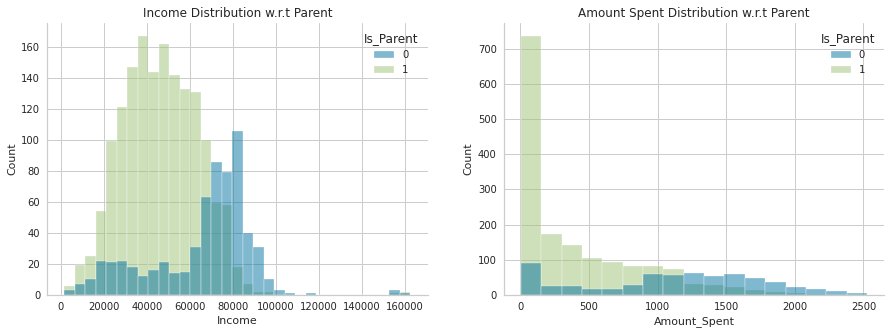

In [ ]:
# Plot the Income and amount w.r.t Is_Parent frequency distribution
fig, ax = plt.subplots(1, 2, figsize=(15,5))
sns.histplot(data=marketing_data, hue='Is_Parent', x='Income', ax=ax[0])
sns.histplot(data=marketing_data, hue='Is_Parent', x='Amount_Spent', ax=ax[1])
ax[0].set_title("Income Distribution w.r.t Parent")
ax[1].set_title("Amount Spent Distribution w.r.t Parent")
plt.show()

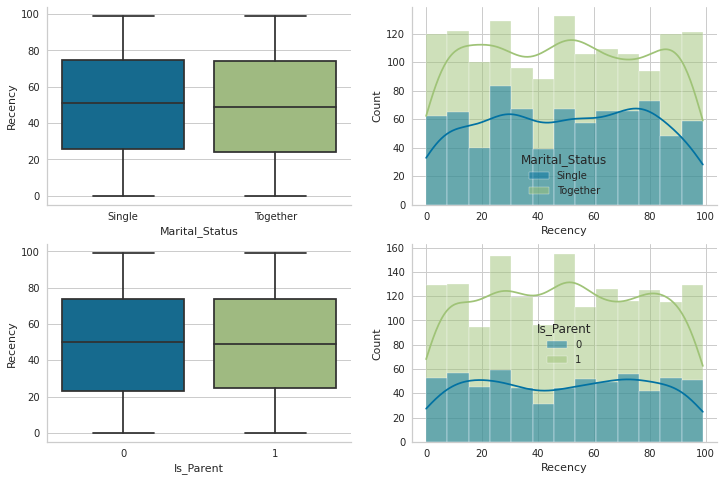

In [ ]:
# Plot the Recency w.r.t Marital Status and Is_Parent
fig, (ax1, ax2) = plt.subplots(2, 2, figsize=(12,8))
sns.boxplot(data=marketing_data, x='Marital_Status', y='Recency', ax=ax1[0])
sns.histplot(data=marketing_data, x='Recency', hue='Marital_Status', ax=ax1[1], kde=True)
sns.boxplot(data=marketing_data, x='Is_Parent', y='Recency', ax=ax2[0])
sns.histplot(data=marketing_data, x='Recency', hue='Is_Parent', ax=ax2[1], kde=True)
plt.show()

In [ ]:
marketing_data[['Education', 'Marital_Status', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].groupby('Marital_Status').mean().T

Marital_Status,Single,Together
MntFruits,27.530303,25.588358
MntMeatProducts,172.871212,163.763687
MntFishProducts,38.452020,36.851005
MntSweetProducts,28.198232,26.486486
MntGoldProds,45.683081,42.913375


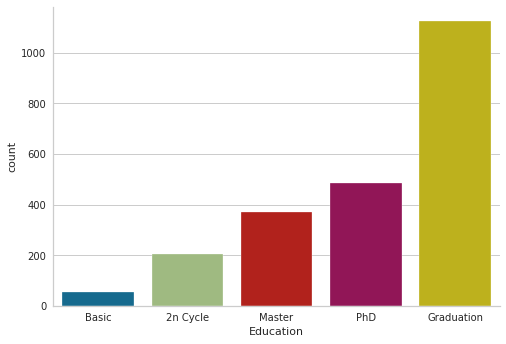

In [ ]:
# Plot the Frequency for each Education category
sns.countplot(data=marketing_data, x='Education', order=['Basic', '2n Cycle', 'Master', 'PhD', 'Graduation'])
plt.show()

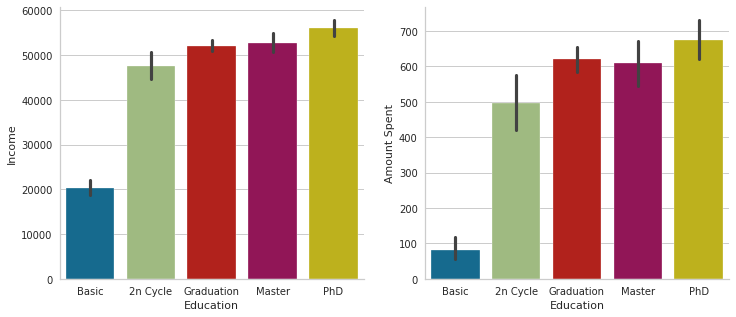

In [ ]:
# Plot the income w.r.t education
fig, ax = plt.subplots(1, 2, figsize=(12,5))
sns.barplot(data=marketing_data, x='Education', y='Income', order = ['Basic', '2n Cycle', 'Graduation', 'Master', 'PhD'], ax=ax[0])
sns.barplot(data=marketing_data, x='Education', y='Amount_Spent', order = ['Basic', '2n Cycle', 'Graduation', 'Master', 'PhD'], ax=ax[1])
ax[0].set_xlabel("Education")
ax[0].set_ylabel("Income")
ax[1].set_xlabel("Education")
ax[1].set_ylabel("Amount Spent")
plt.show()

* PhD, Master and Graduation level educated people are most earners and spenders. Hence, they can be targeted with higher end goods campaigns.

# Dimensionality Reduction and Clustering

In [ ]:
# Drop the variables which represent campaign deals
cols_to_drop = ['ID', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
marketing_data_copy = marketing_data.copy()
marketing_data_copy.drop(cols_to_drop, axis=1, inplace=True)

In [ ]:
marketing_data_copy['Total_Purchases'] = (marketing_data_copy['NumDealsPurchases']+
                                          marketing_data_copy['NumWebPurchases']+
                                          marketing_data_copy['NumCatalogPurchases']+
                                          marketing_data_copy['NumStorePurchases'])
marketing_data_copy.head()

,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Age_of_Customer,Children_Count,Family_Members_Count,Is_Parent,Num_year_since_customer,Amount_Spent,AmountSpent_Income_Ratio,Total_Purchases
0,Graduation,Single,58138.0,58,635,88,546,172,88,88,3,8,10,4,7,0,64,0,1,0,9,1617,0.027813,25
1,Graduation,Single,46344.0,38,11,1,6,2,1,6,2,1,1,2,5,0,67,2,3,1,7,27,0.000583,6
2,Graduation,Together,71613.0,26,426,49,127,111,21,42,1,8,2,10,4,0,56,0,2,0,8,776,0.010836,21
3,Graduation,Together,26646.0,26,11,4,20,10,3,5,2,2,0,4,6,0,37,1,3,1,7,53,0.001989,8
4,PhD,Together,58293.0,94,173,43,118,46,27,15,5,5,3,6,5,0,40,1,3,1,7,422,0.007239,19


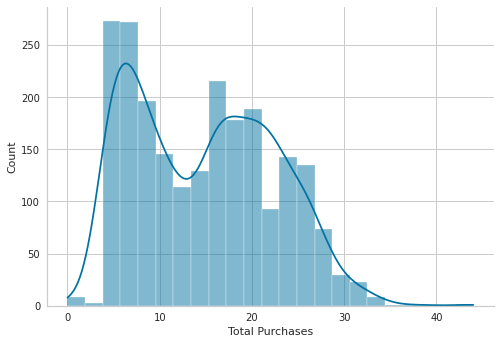

In [ ]:
# plot the Total Purchases
sns.histplot(data=marketing_data_copy, x='Total_Purchases', kde=True)
plt.xlabel("Total Purchases")
plt.show()

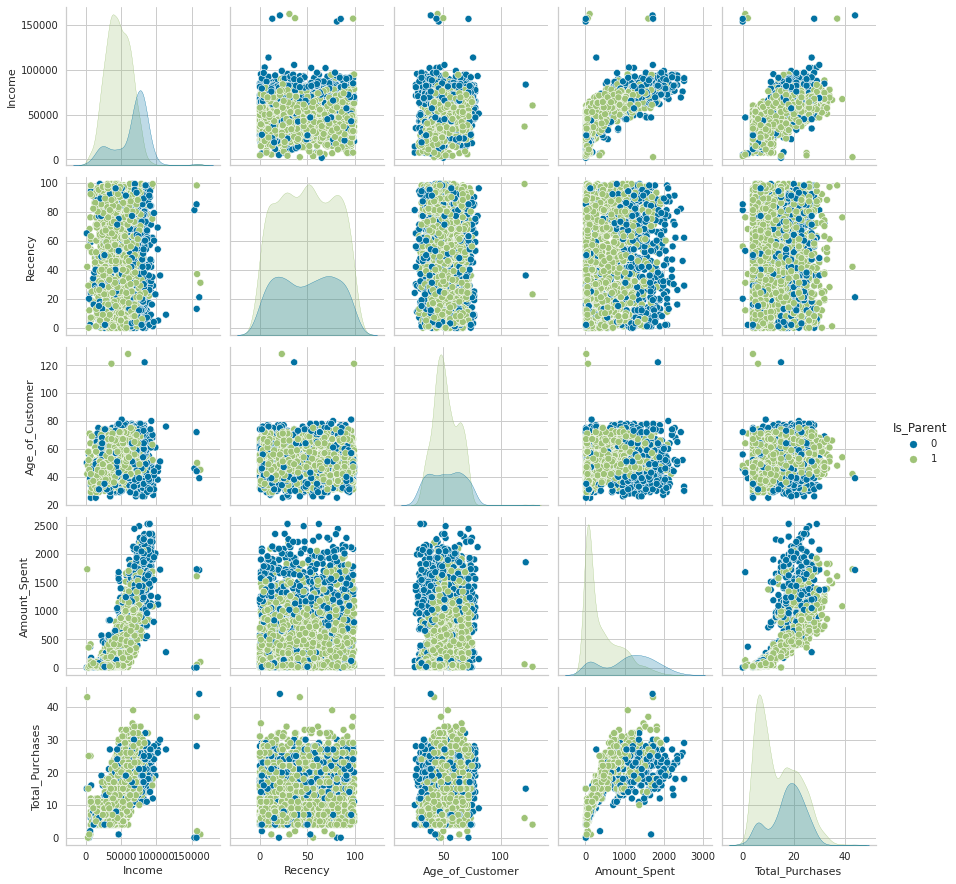

In [ ]:
# plotting the following variables
cols_to_plot = [ "Income", "Recency", "Age_of_Customer", "Amount_Spent", "Is_Parent", "Total_Purchases"]
sns.pairplot(data=marketing_data_copy[cols_to_plot], hue='Is_Parent')
plt.show()

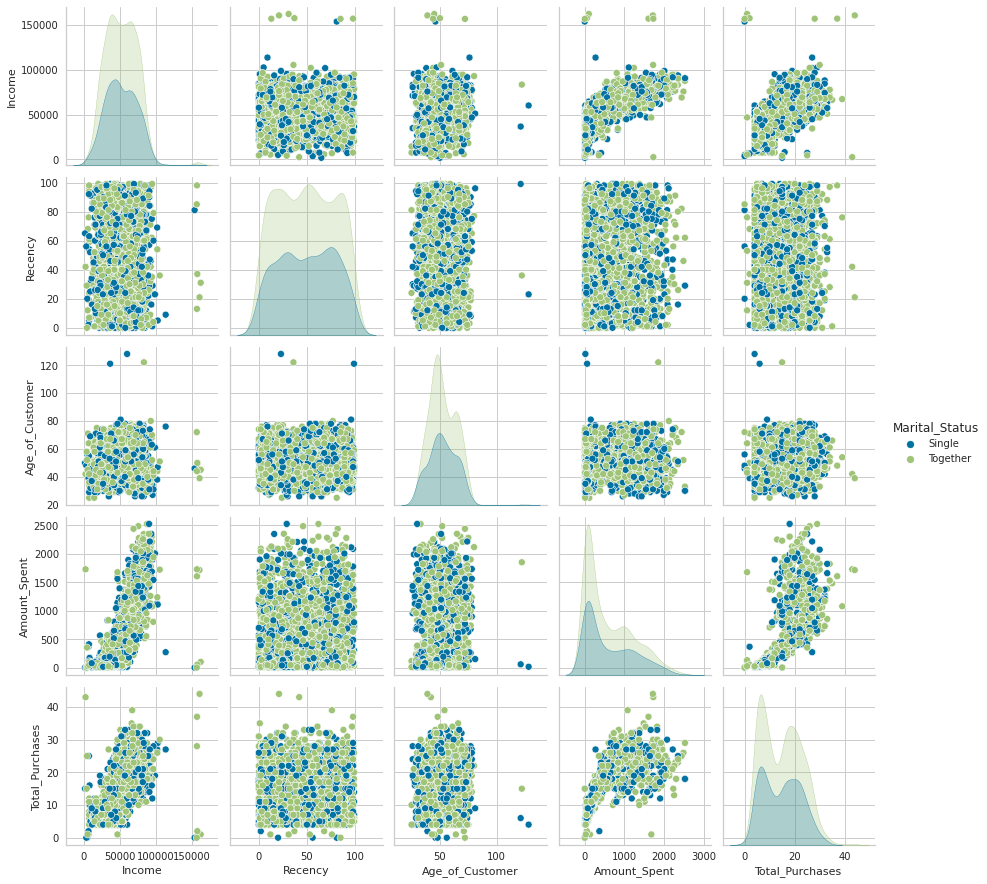

In [ ]:
cols_to_plot = [ "Income", "Recency", "Age_of_Customer", "Amount_Spent", "Marital_Status", "Total_Purchases"]
sns.pairplot(data=marketing_data_copy[cols_to_plot], hue='Marital_Status')
plt.show()

In [ ]:
# Encode the categorical variables

# 1. Encode ordnial variables : Education
education_encoding = {'2n Cycle' : 0,
                      'Basic' : 1,
                      'Graduation' : 2, 
                      'Master' : 3,
                      'PhD' : 4}

marketing_data_copy['Education'] = marketing_data['Education'].apply(lambda x : education_encoding[x])

# 2. Encode the Nominal Variable : Marital_Status
marketing_data_copy = pd.get_dummies(marketing_data_copy, drop_first=True)
marketing_data_copy.head()

,Education,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Age_of_Customer,Children_Count,Family_Members_Count,Is_Parent,Num_year_since_customer,Amount_Spent,AmountSpent_Income_Ratio,Total_Purchases,Marital_Status_Together
0,2,58138.0,58,635,88,546,172,88,88,3,8,10,4,7,0,64,0,1,0,9,1617,0.027813,25,0
1,2,46344.0,38,11,1,6,2,1,6,2,1,1,2,5,0,67,2,3,1,7,27,0.000583,6,0
2,2,71613.0,26,426,49,127,111,21,42,1,8,2,10,4,0,56,0,2,0,8,776,0.010836,21,1
3,2,26646.0,26,11,4,20,10,3,5,2,2,0,4,6,0,37,1,3,1,7,53,0.001989,8,1
4,4,58293.0,94,173,43,118,46,27,15,5,5,3,6,5,0,40,1,3,1,7,422,0.007239,19,1


In [ ]:
# Scale the data
ss = StandardScaler()
marketing_data_copy_scaled = ss.fit_transform(marketing_data_copy)
marketing_data_copy = pd.DataFrame(marketing_data_copy_scaled, columns=marketing_data_copy.columns)
marketing_data_copy.head()

,Education,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Age_of_Customer,Children_Count,Family_Members_Count,Is_Parent,Num_year_since_customer,Amount_Spent,AmountSpent_Income_Ratio,Total_Purchases,Marital_Status_Together
0,-0.348906,0.291232,0.305399,0.982708,1.552382,1.678839,2.472419,1.474842,0.848580,0.350905,1.409095,2.513248,-0.550410,0.69401,-0.097391,0.984431,-1.265043,-1.761967,-1.585607,1.504902,1.678826,1.066628,1.320673,-1.349804
1,-0.348906,-0.259334,-0.385457,-0.869919,-0.635719,-0.713118,-0.650675,-0.631835,-0.729094,-0.166767,-1.109215,-0.568373,-1.165185,-0.13083,-0.097391,1.234862,1.394760,0.444811,0.630673,-1.419842,-0.960627,-0.556308,-1.152967,-1.349804
2,-0.348906,0.920271,-0.799971,0.362196,0.571509,-0.177142,1.351779,-0.147542,-0.036457,-0.684438,1.409095,-0.225970,1.293916,-0.54325,-0.097391,0.316615,-1.265043,-0.658578,-1.585607,0.042530,0.282738,0.054794,0.799906,0.740849
3,-0.348906,-1.178874,-0.799971,-0.869919,-0.560267,-0.651104,-0.503706,-0.583406,-0.748334,-0.166767,-0.749457,-0.910775,-0.550410,0.28159,-0.097391,-1.269448,0.064859,0.444811,0.630673,-1.419842,-0.917466,-0.472485,-0.892584,0.740849
4,1.429439,0.298468,1.548939,-0.388949,0.420606,-0.217008,0.157655,-0.002254,-0.555935,1.386248,0.329819,0.116432,0.064366,-0.13083,-0.097391,-1.019017,0.064859,0.444811,0.630673,-1.419842,-0.304914,-0.159570,0.539523,0.740849


In [ ]:
# Dimensionality Reduction
pca = PCA(n_components=3, random_state=42)
marketing_data_reduced = pca.fit_transform(marketing_data_copy)

# Convert into df
reduced_df = pd.DataFrame(marketing_data_reduced, columns=['Column1', 'Column2', 'Column3'])

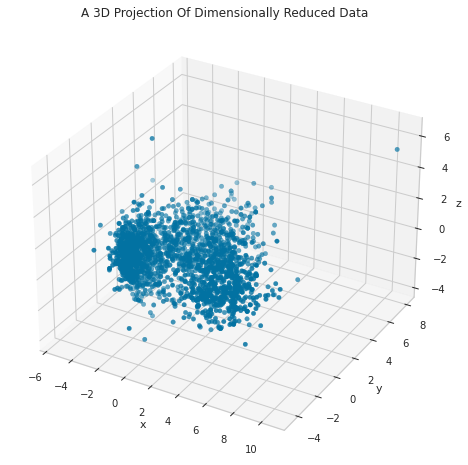

In [ ]:
# plot the reduced data
x = reduced_df['Column1']
y = reduced_df['Column2']
z = reduced_df['Column3']

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, marker="o" )
ax.set_title("A 3D Projection Of Dimensionally Reduced Data")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

1. **Next, I will be using Elbow method to confirm the number of clusters.**
2. **Since, the clusters seem spherical, KMeans Clustering should be a good approach.**

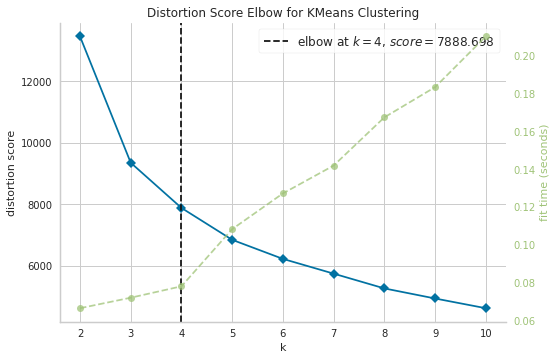

In [ ]:
# Run the Elbow Method
kmeans = KMeans()
elbow_method = KElbowVisualizer(kmeans)
elbow_method.fit(reduced_df)
elbow_method.show()
plt.show()

**Although, Elbow method is a good approach to determine the number of clusters, there is another way with which we can find the ideal number of clusters. It's called the silhouette score analysis.**

In [ ]:
# List to store the silhouette score of the model
silhouette_scores = []

# iterate for k = 2 to 11 
for i in range(2, 11):
    
    # initialise the model and fit on the reduced dataset
    kmeans = KMeans(n_clusters=i, random_state=2)
    kmeans.fit(reduced_df)
    
    # Compute the silhouette_score and append in the list
    sil_score = silhouette_score(reduced_df, kmeans.labels_)
    silhouette_scores.append(sil_score)

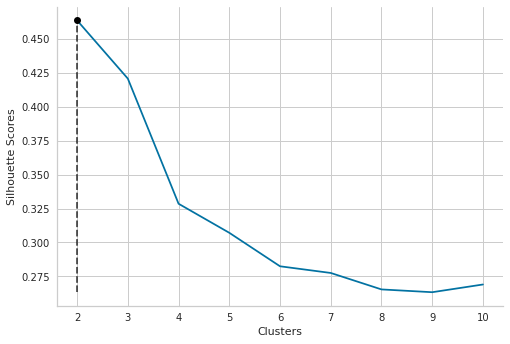

In [ ]:
# Plot the silhouette scores

max_silhouette_score = [max(silhouette_scores)]*10
min_silhouette_score = min(silhouette_scores)
corresponding_cluster = [silhouette_scores.index(max_silhouette_score[0]) + 2]*10

x = np.arange(2,11) # number of clusters
plt.plot(x, silhouette_scores)
plt.plot(corresponding_cluster[0], max_silhouette_score[0], color='black', marker='o')
plt.hlines(max_silhouette_score, linestyle='--', xmax=corresponding_cluster[0], xmin=2, color='black', alpha=0.1)
plt.vlines(corresponding_cluster, linestyle='--', ymax=max_silhouette_score[0], ymin=min_silhouette_score, color='black', alpha=0.1)
plt.xlabel("Clusters")
plt.ylabel("Silhouette Scores")
plt.show()

* We can go ahead with either 3 or 4 clusters. Let's compare both.

In [ ]:
# 1. With k = 3

kmeans_final_1 = KMeans(n_clusters=3, n_init = 20, max_iter=500)
kmeans_final_1.fit(reduced_df)
clusters = kmeans_final_1.predict(reduced_df)
marketing_data['clusters_1'] = clusters
reduced_df['clusters_1'] = clusters

# 2. With k = 4

kmeans_final_2 = KMeans(n_clusters=4, n_init = 20, max_iter=500)
kmeans_final_2.fit(reduced_df)
clusters = kmeans_final_2.predict(reduced_df)
marketing_data['clusters_2'] = clusters
reduced_df['clusters_2'] = clusters

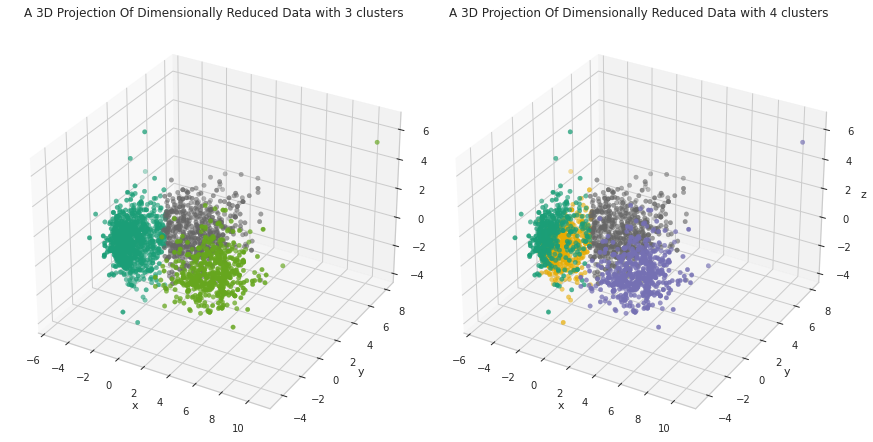

In [ ]:
# plot the reduced data
x = reduced_df['Column1']
y = reduced_df['Column2']
z = reduced_df['Column3']

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(1,2,1, projection="3d")
ax1.scatter(x,y,z, c=reduced_df['clusters_1'], marker="o", cmap='Dark2')
ax1.set_title("A 3D Projection Of Dimensionally Reduced Data with 3 clusters")
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')

ax2 = fig.add_subplot(1, 2, 2, projection="3d")
ax2.scatter(x,y,z, c=reduced_df['clusters_2'], marker="o", cmap='Dark2')
ax2.set_title("A 3D Projection Of Dimensionally Reduced Data with 4 clusters")
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('z')
plt.tight_layout()
fig.show()

# Customer Profiling

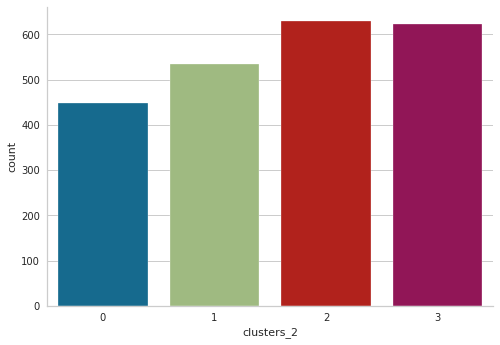

In [ ]:
# Plot the cluster distribution
sns.countplot(data=marketing_data, x='clusters_2')
plt.show()

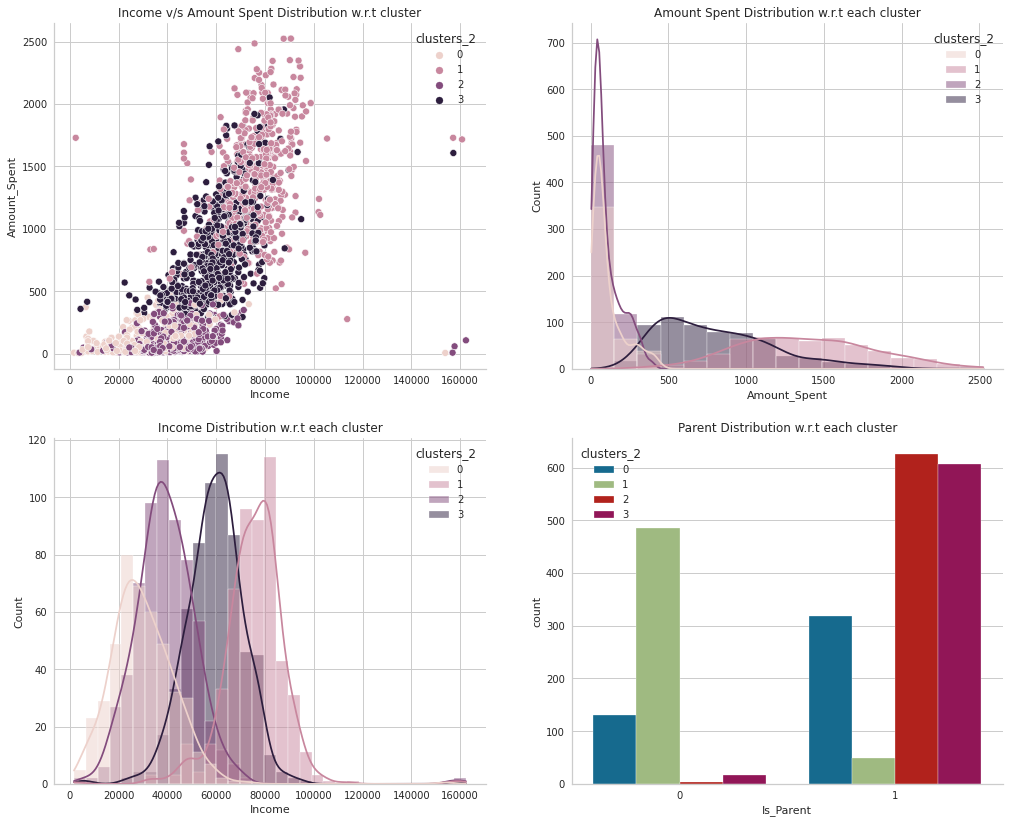

In [ ]:
# Plot the variables w.r.t clusters
fig, ax = plt.subplots(2, 2, figsize=(17,14))
sns.scatterplot(data=marketing_data, x='Income', y='Amount_Spent', hue='clusters_2', ax=ax[0][0])
sns.histplot(data=marketing_data, x='Amount_Spent', hue='clusters_2', kde=True, ax=ax[0][1])
sns.histplot(data=marketing_data, x='Income', hue='clusters_2', kde=True, ax=ax[1][0])
sns.countplot(data=marketing_data, x='Is_Parent', hue='clusters_2', ax=ax[1][1])
ax[0][0].set_title("Income v/s Amount Spent Distribution w.r.t cluster")
ax[0][1].set_title("Amount Spent Distribution w.r.t each cluster")
ax[1][0].set_title("Income Distribution w.r.t each cluster")
ax[1][1].set_title("Parent Distribution w.r.t each cluster")
plt.show()

1. Cluster 0 has High Income and High Spending people. Also, cluster 0 people do not have any child.
2. Cluster 1 are Low Income groups and low spending people, are mostly parents.
3. Cluster 2 are Middle Income Groups and High spending people, are mostly parents.
4. Cluster 4 are Low Income and Low Spending people,are mostly parents.

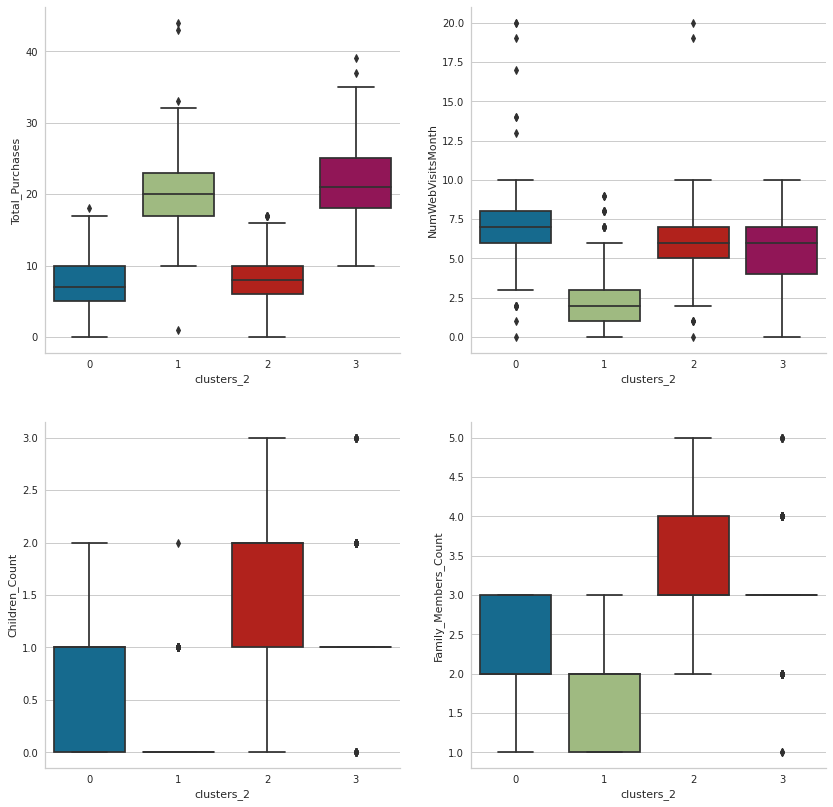

In [ ]:
# Create a new column called total purchases and plot it w.r.t each cluster
total_purchases = (marketing_data['NumDealsPurchases'] + 
                   marketing_data['NumWebPurchases'] + 
                   marketing_data['NumCatalogPurchases'] + 
                   marketing_data['NumStorePurchases'])
marketing_data['Total_Purchases'] = total_purchases

# Plot the total purchases
fig, (ax1, ax2) = plt.subplots(2, 2, figsize=(14,14))
sns.boxplot(data=marketing_data, x = 'clusters_2', y= 'Total_Purchases', ax=ax1[0])
sns.boxplot(data=marketing_data, x = 'clusters_2', y= 'NumWebVisitsMonth', ax=ax1[1])
sns.boxplot(data=marketing_data, x='clusters_2', y='Children_Count', ax=ax2[0])
sns.boxplot(data=marketing_data, x='clusters_2', y='Family_Members_Count', ax=ax2[1])
plt.show()

* Cluster 0 and Cluster 2 have people with relatively more number of purchases.
* Cluster 1 and Cluster 3 have people with less number of total purchases.
* Cluster 1 has people with most website visits.
* Cluster 3 has most number of children.
* Cluster 3 has most number of family members.

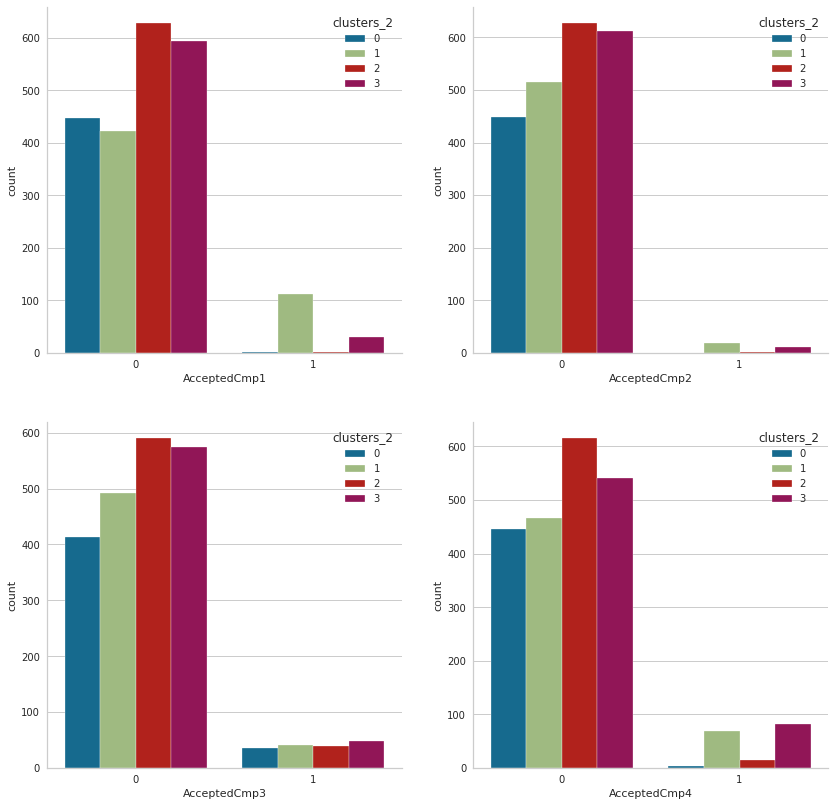

In [ ]:
# Plot the Deals and Response Variables
fig, (ax1, ax2) = plt.subplots(2, 2, figsize=(14,14))
sns.countplot(data=marketing_data, x = 'AcceptedCmp1', hue='clusters_2', ax=ax1[0])
sns.countplot(data=marketing_data, x = 'AcceptedCmp2', hue='clusters_2', ax=ax1[1])
sns.countplot(data=marketing_data, x = 'AcceptedCmp3', hue='clusters_2', ax=ax2[0])
sns.countplot(data=marketing_data, x = 'AcceptedCmp4', hue='clusters_2', ax=ax2[1])
plt.show()

**Campaigns are not working well to convert leads into customers.**

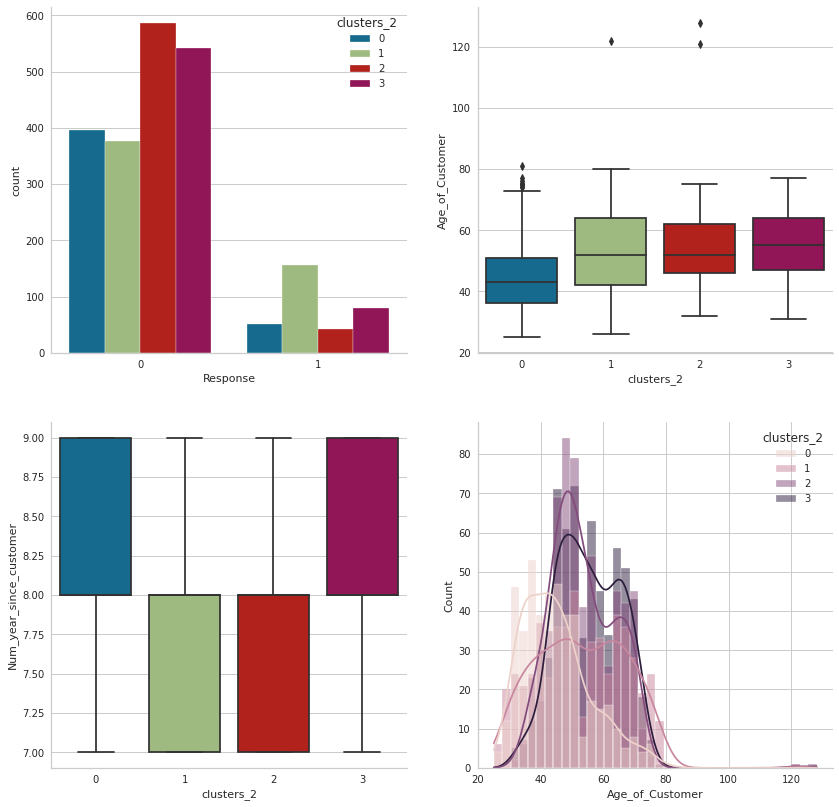

In [ ]:
# Plot the 
fig, (ax1, ax2) = plt.subplots(2, 2, figsize=(14,14))
sns.countplot(data=marketing_data, x = 'Response', hue='clusters_2', ax=ax1[0])
sns.boxplot(data=marketing_data, x = 'clusters_2', y='Age_of_Customer', ax=ax1[1])
sns.boxplot(data=marketing_data, x = 'clusters_2', y='Num_year_since_customer', ax=ax2[0])
sns.histplot(data=marketing_data, x = 'Age_of_Customer', hue='clusters_2', ax=ax2[1], kde=True)
plt.show()

* Cluster 0 people are most converted from leads to buyers.
* Age distribution is almost even.

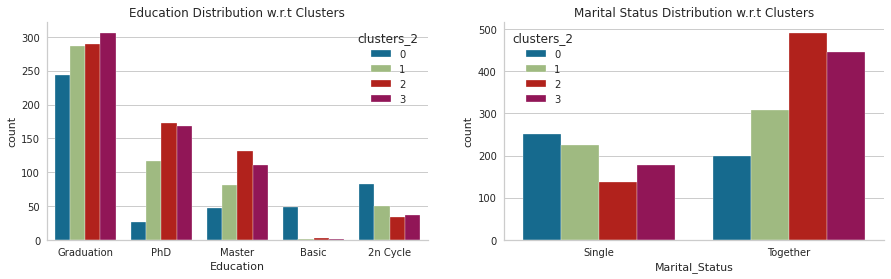

In [ ]:
# Plot the Education w.r.t clusters
fig, ax = plt.subplots(1, 2, figsize=(15,4))
sns.countplot(data=marketing_data, x='Education', hue='clusters_2', ax=ax[0])
sns.countplot(data=marketing_data, x='Marital_Status', hue='clusters_2', ax=ax[1])
ax[0].set_title("Education Distribution w.r.t Clusters")
ax[1].set_title("Marital Status Distribution w.r.t Clusters")
plt.show()

# Summarizing It All

## Cluster 0
* High Income People
* High Spending People
* Make more number of Purchases.
* Are not Parents.
* Most likely to accept deals and promos.

## Cluster 1
* Low Income People
* Low Spending People
* Make less number of Purchases.
* Make most website visits.
* Are Both Parents and Non Parents.
* Least likely to accept deals and promos.

## Cluster 2
* Middle Income People
* High Spending People
* Make more number of Purchases.
* Makes more number of website visits.
* Are Parents.
* Most likely to accept deals and promos.

## Cluster 3
* Low Income People
* Low Spending People
* Make less number of Purchases.
* Are Parents.
* Have most number of family members.
* More likely to accept deals and promos.

